Epoch: 0/15000		Training cost = 1.56e+00		Validation cost = 1.71e+00
Epoch: 100/15000		Training cost = 1.15e+00		Validation cost = 1.26e+00
Epoch: 200/15000		Training cost = 8.33e-01		Validation cost = 9.13e-01
Epoch: 300/15000		Training cost = 6.04e-01		Validation cost = 6.54e-01
Epoch: 400/15000		Training cost = 4.67e-01		Validation cost = 4.97e-01
Epoch: 500/15000		Training cost = 4.04e-01		Validation cost = 4.27e-01
Epoch: 600/15000		Training cost = 3.75e-01		Validation cost = 4.00e-01
Epoch: 700/15000		Training cost = 3.60e-01		Validation cost = 3.89e-01
Epoch: 800/15000		Training cost = 3.49e-01		Validation cost = 3.81e-01
Epoch: 900/15000		Training cost = 3.38e-01		Validation cost = 3.74e-01
Epoch: 1000/15000		Training cost = 3.26e-01		Validation cost = 3.65e-01
Epoch: 1100/15000		Training cost = 3.14e-01		Validation cost = 3.56e-01
Epoch: 1200/15000		Training cost = 2.99e-01		Validation cost = 3.44e-01
Epoch: 1300/15000		Training cost = 2.84e-01		Validation cost = 3.31e-01
Epoc

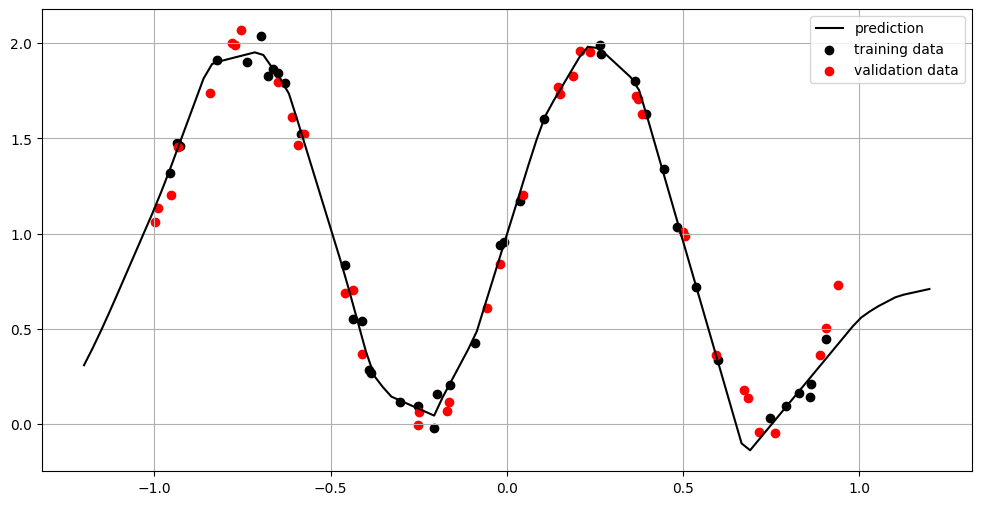

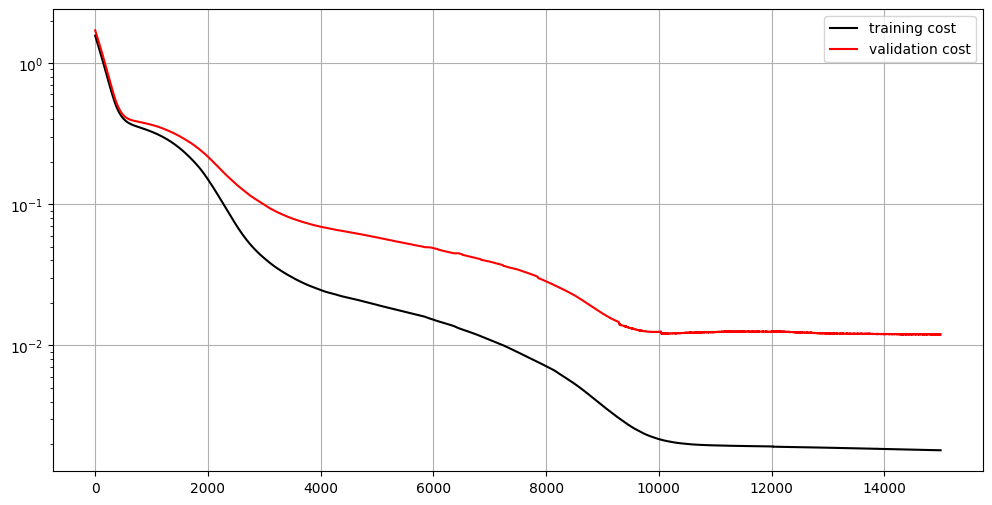

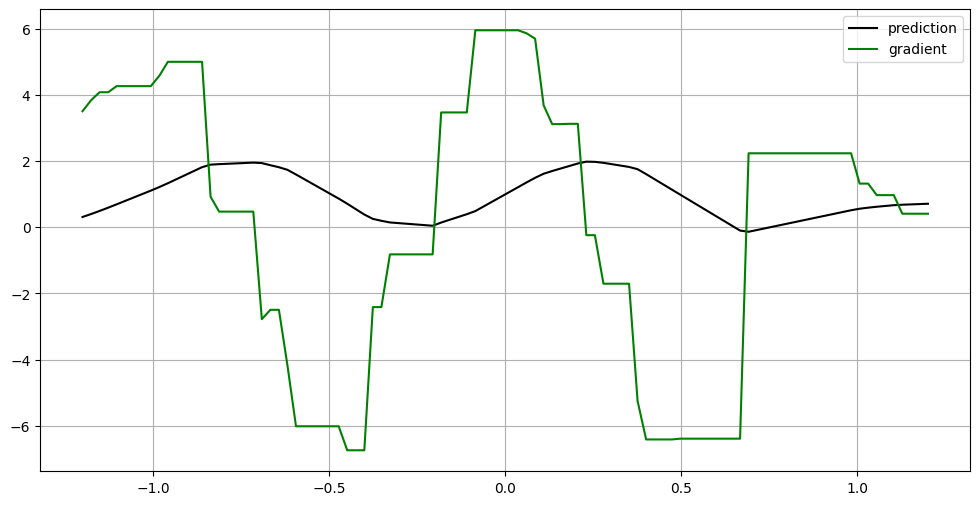

In [4]:
### Tópico 5 da AE1

### Vou pegar o código feito para exercicio 07 do 3 cap (Removerei meus comentários sobre cada linha, deixarei apenas os hiperparâmetros)

# Fiquei feliz que consegui diminuir a sobreajuste ^^

import torch
import numpy as np
import matplotlib.pyplot as plt


# Data generation

torch.manual_seed(0)

# f = lambda x: torch.sin(2 * torch.pi * x)
f = lambda x: torch.sin(2 * torch.pi * x) +1
# Desta forma os resultados vão variar de 0 a 2

numberOfSamples = 40
noise = 0.1

xTrain = torch.rand((numberOfSamples, 1)) * 2 - 1
yTrain = f(xTrain) + noise * (torch.rand(xTrain.shape) * 2 - 1)

xTest = torch.rand((numberOfSamples, 1)) * 2 - 1
yTest = f(xTest) + noise * (torch.rand(xTest.shape) * 2 - 1)

# Model setup

inputDimension = 1
# hiddenDimensions = [20,20]
# [20,20] significa que serão 2 camadas com 20 neurônios.
# hiddenDimensions = [2]
hiddenDimensions = [50,50]

outputDimension = 1

# nonlinearity = torch.nn.Sigmoid()
nonlinearity = torch.nn.ReLU()
# As linhas a cima são as funções de ativações

modules = []

modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))

modules.append(nonlinearity)
for i in range(len(hiddenDimensions) - 1):
    modules.append(torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1]))
    modules.append(nonlinearity)

modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))

model = torch.nn.Sequential(*modules)

# hyperparameters & optimizer

# epochs = 10000
# epochs = 30000
epochs = 15000 # Novo parametro
# Aumentei o número de épocas, afim de forçar a sobreposição.
# lr = 1e-3
# lr = 1e-1
# lr = 1e-3
lr = 1e-4 # Novo parametro
# regularization = 1e-4 # Novo parametro
regularization = 1e-5

optimizer = torch.optim.Adam(
    model.parameters(), lr, weight_decay=regularization)

# cost function

def costFunction(yPred, y):
    cost = torch.mean((yPred - y) ** 2)
    return cost

#training loop

costHistoryTrain = np.zeros(epochs)
costHistoryTest = np.zeros(epochs)
for epoch in range(epochs):
    optimizer.zero_grad()

    yPred = model(xTrain)
    cost = costFunction(yPred, yTrain)

    with torch.no_grad():
        yPredTest = model(xTest)
        costTest = costFunction(yPredTest, yTest)

    costHistoryTrain[epoch] = cost.detach()
    costHistoryTest[epoch] = costTest

    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
        print(string.format(epoch, epochs, cost.detach(), costTest))

#visualize the prediction

x = torch.linspace(-1.2, 1.2, 100).unsqueeze(1)
yPred = model(x).detach()

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x, yPred, "k", label="prediction")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.scatter(xTest, yTest, color="r", label="validation data")
ax.legend()
plt.show()

# visualize the training history

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(costHistoryTrain, "k", label="training cost")
ax.plot(costHistoryTest, "r", label="validation cost")
ax.legend()
ax.set_yscale("log")
plt.show()

# compute derivative visualization for reference

x = torch.linspace(-1.2, 1.2, 100, requires_grad=True).unsqueeze(1)
yPred = model(x)
gradients = torch.autograd.grad(yPred, x, grad_outputs=torch.ones_like(yPred))[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x.detach().numpy(), yPred.detach().numpy(), "k", label="prediction")
ax.plot(x.detach().numpy(), gradients, 'g', label='gradient')
ax.legend()
plt.show()
